In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


4 1 2


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:268: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


In [3]:
# from sac import SAC
# agent = SAC(env.observation_space.shape[0], env.action_space)
# agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

In [4]:
# データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

offline_data[1].sum() tensor(2008.6974)
(100, 2)


In [6]:
# import importlib
# importlib.reload(vi_base)
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":None,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
    }

vi = vi_base.baseVI(args_init_dict)
# print(np.random.randn())

dec: h_dim 64


In [7]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()


train_vae: enc_dec
train: iter 0  trainloss 117826.31256  validloss 69047.59462±0.00000  bestvalidloss 69047.59462  last_update 0
train: iter 1  trainloss 46026.26114  validloss 4684.49555±0.00000  bestvalidloss 4684.49555  last_update 0
train: iter 2  trainloss 1128.31838  validloss 2320.33839±0.00000  bestvalidloss 2320.33839  last_update 0
train: iter 3  trainloss 1021.82582  validloss 1209.55135±0.00000  bestvalidloss 1209.55135  last_update 0
train: iter 4  trainloss 869.26511  validloss 1507.30125±0.00000  bestvalidloss 1209.55135  last_update 1
train: iter 5  trainloss 779.66786  validloss 1003.83429±0.00000  bestvalidloss 1003.83429  last_update 0
train: iter 6  trainloss 767.12738  validloss 995.14189±0.00000  bestvalidloss 995.14189  last_update 0
train: iter 7  trainloss 717.18211  validloss 975.32162±0.00000  bestvalidloss 975.32162  last_update 0
train: iter 8  trainloss 686.37156  validloss 928.11358±0.00000  bestvalidloss 928.11358  last_update 0
train: iter 9  trainloss

train: iter 77  trainloss -512.44206  validloss -523.74870±0.00000  bestvalidloss -600.10178  last_update 3
train: iter 78  trainloss -512.27821  validloss -455.08649±0.00000  bestvalidloss -600.10178  last_update 4
train: iter 79  trainloss -547.68939  validloss -588.11619±0.00000  bestvalidloss -600.10178  last_update 5
train: iter 80  trainloss -568.18723  validloss -622.60888±0.00000  bestvalidloss -622.60888  last_update 0
train: iter 81  trainloss -550.67822  validloss -633.06181±0.00000  bestvalidloss -633.06181  last_update 0
train: iter 82  trainloss -529.41579  validloss -495.62324±0.00000  bestvalidloss -633.06181  last_update 1
train: iter 83  trainloss -576.63605  validloss -565.46241±0.00000  bestvalidloss -633.06181  last_update 2
train: iter 84  trainloss -487.09961  validloss -584.82957±0.00000  bestvalidloss -633.06181  last_update 3
train: iter 85  trainloss -389.77824  validloss -499.81106±0.00000  bestvalidloss -633.06181  last_update 4
train: iter 86  trainloss -5

train: iter 153  trainloss -835.09664  validloss -915.17638±0.00000  bestvalidloss -915.17638  last_update 0
train: iter 154  trainloss -809.70895  validloss -795.38656±0.00000  bestvalidloss -915.17638  last_update 1
train: iter 155  trainloss -686.94646  validloss -834.80084±0.00000  bestvalidloss -915.17638  last_update 2
train: iter 156  trainloss -771.14612  validloss -923.54550±0.00000  bestvalidloss -923.54550  last_update 0
train: iter 157  trainloss -864.91195  validloss -883.53936±0.00000  bestvalidloss -923.54550  last_update 1
train: iter 158  trainloss -861.13782  validloss -965.80063±0.00000  bestvalidloss -965.80063  last_update 0
train: iter 159  trainloss -892.41853  validloss -972.50673±0.00000  bestvalidloss -972.50673  last_update 0
train: iter 160  trainloss -827.61928  validloss -850.08518±0.00000  bestvalidloss -972.50673  last_update 1
train: iter 161  trainloss -569.44260  validloss -567.92762±0.00000  bestvalidloss -972.50673  last_update 2
train: iter 162  tr

train: iter 228  trainloss -1015.94662  validloss -935.77985±0.00000  bestvalidloss -1184.66245  last_update 8
train: iter 229  trainloss -991.97211  validloss -1090.25651±0.00000  bestvalidloss -1184.66245  last_update 9
train: iter 230  trainloss -934.81578  validloss -1071.50567±0.00000  bestvalidloss -1184.66245  last_update 10
train: iter 231  trainloss -1079.38537  validloss -1048.75897±0.00000  bestvalidloss -1184.66245  last_update 11
train: iter 232  trainloss -1110.25392  validloss -1050.41624±0.00000  bestvalidloss -1184.66245  last_update 12
train: iter 233  trainloss -1171.31201  validloss -1204.49204±0.00000  bestvalidloss -1204.49204  last_update 0
train: iter 234  trainloss -916.75838  validloss -1207.82611±0.00000  bestvalidloss -1207.82611  last_update 0
train: iter 235  trainloss -1060.27584  validloss -1045.67327±0.00000  bestvalidloss -1207.82611  last_update 1
train: iter 236  trainloss -721.49137  validloss -1175.90383±0.00000  bestvalidloss -1207.82611  last_upd

train: iter 302  trainloss -1041.03284  validloss -554.32118±0.00000  bestvalidloss -1323.39765  last_update 12
train: iter 303  trainloss -1135.23968  validloss -1319.66721±0.00000  bestvalidloss -1323.39765  last_update 13
train: iter 304  trainloss -1258.65176  validloss -1298.81521±0.00000  bestvalidloss -1323.39765  last_update 14
train: iter 305  trainloss -1038.79481  validloss -1285.80536±0.00000  bestvalidloss -1323.39765  last_update 15
train: iter 306  trainloss -1263.07090  validloss -1244.84414±0.00000  bestvalidloss -1323.39765  last_update 16
train: iter 307  trainloss -1249.20413  validloss -1260.59950±0.00000  bestvalidloss -1323.39765  last_update 17
train: iter 308  trainloss -1252.03017  validloss -1306.20548±0.00000  bestvalidloss -1323.39765  last_update 18
train: iter 309  trainloss -1209.21333  validloss -1329.70174±0.00000  bestvalidloss -1329.70174  last_update 0
train: iter 310  trainloss -1253.78882  validloss -1294.39085±0.00000  bestvalidloss -1329.70174  

train: iter 376  trainloss -886.46555  validloss -1291.89894±0.00000  bestvalidloss -1456.25467  last_update 4
train: iter 377  trainloss -1244.24900  validloss -1226.70942±0.00000  bestvalidloss -1456.25467  last_update 5
train: iter 378  trainloss -1314.42490  validloss -1364.72857±0.00000  bestvalidloss -1456.25467  last_update 6
train: iter 379  trainloss -1329.87080  validloss -1368.62313±0.00000  bestvalidloss -1456.25467  last_update 7
train: iter 380  trainloss -1326.16865  validloss -1413.32789±0.00000  bestvalidloss -1456.25467  last_update 8
train: iter 381  trainloss -1366.24591  validloss -1378.80718±0.00000  bestvalidloss -1456.25467  last_update 9
train: iter 382  trainloss -1282.26229  validloss -1267.38587±0.00000  bestvalidloss -1456.25467  last_update 10
train: iter 383  trainloss -1259.46005  validloss -1247.81787±0.00000  bestvalidloss -1456.25467  last_update 11
train: iter 384  trainloss -1289.99792  validloss -1277.42194±0.00000  bestvalidloss -1456.25467  last_

train: iter 449  trainloss -1325.32423  validloss -1346.86137±0.00000  bestvalidloss -1489.86240  last_update 4
train: iter 450  trainloss -1319.47299  validloss -1403.42768±0.00000  bestvalidloss -1489.86240  last_update 5
train: iter 451  trainloss -1385.65086  validloss -1387.79487±0.00000  bestvalidloss -1489.86240  last_update 6
train: iter 452  trainloss -1386.08577  validloss -1459.45963±0.00000  bestvalidloss -1489.86240  last_update 7
train: iter 453  trainloss -1312.26211  validloss -1277.10598±0.00000  bestvalidloss -1489.86240  last_update 8
train: iter 454  trainloss -1453.17927  validloss -1492.88172±0.00000  bestvalidloss -1492.88172  last_update 0
train: iter 455  trainloss -1449.35823  validloss -1448.99738±0.00000  bestvalidloss -1492.88172  last_update 1
train: iter 456  trainloss -1333.67553  validloss -1353.26472±0.00000  bestvalidloss -1492.88172  last_update 2
train: iter 457  trainloss -1425.13609  validloss -1478.09277±0.00000  bestvalidloss -1492.88172  last_u

train: iter 522  trainloss -1268.87665  validloss -650.21060±0.00000  bestvalidloss -1521.43948  last_update 15
train: iter 523  trainloss -1355.37078  validloss -1413.50856±0.00000  bestvalidloss -1521.43948  last_update 16
train: iter 524  trainloss -1323.33766  validloss -1399.40332±0.00000  bestvalidloss -1521.43948  last_update 17
train: iter 525  trainloss -1463.21411  validloss -1489.76730±0.00000  bestvalidloss -1521.43948  last_update 18
train: iter 526  trainloss -1469.39726  validloss -1508.48570±0.00000  bestvalidloss -1521.43948  last_update 19
train: iter 527  trainloss -1368.15441  validloss -1466.46555±0.00000  bestvalidloss -1521.43948  last_update 20
train: iter 528  trainloss -1457.73980  validloss -1486.22678±0.00000  bestvalidloss -1521.43948  last_update 21
train: iter 529  trainloss -1441.20953  validloss -1520.64729±0.00000  bestvalidloss -1521.43948  last_update 22
train: iter 530  trainloss -1420.78604  validloss -1461.98731±0.00000  bestvalidloss -1521.43948 

train: iter 595  trainloss -1019.56594  validloss -1470.91873±0.00000  bestvalidloss -1543.62395  last_update 12
train: iter 596  trainloss -953.36579  validloss -614.40741±0.00000  bestvalidloss -1543.62395  last_update 13
train: iter 597  trainloss -1292.37616  validloss -1282.16000±0.00000  bestvalidloss -1543.62395  last_update 14
train: iter 598  trainloss -1317.59754  validloss -1430.92459±0.00000  bestvalidloss -1543.62395  last_update 15
train: iter 599  trainloss -1206.77447  validloss -1414.93863±0.00000  bestvalidloss -1543.62395  last_update 16
train: iter 600  trainloss -1383.92917  validloss -1353.89675±0.00000  bestvalidloss -1543.62395  last_update 17
train: iter 601  trainloss -1434.41302  validloss -1413.24291±0.00000  bestvalidloss -1543.62395  last_update 18
train: iter 602  trainloss -1414.25092  validloss -1473.26180±0.00000  bestvalidloss -1543.62395  last_update 19
train: iter 603  trainloss -1115.93912  validloss -1425.35293±0.00000  bestvalidloss -1543.62395  

train: iter 668  trainloss -1484.27321  validloss -1289.38046±0.00000  bestvalidloss -1568.35467  last_update 25
train: iter 669  trainloss -1468.34561  validloss -1556.43698±0.00000  bestvalidloss -1568.35467  last_update 26
train: iter 670  trainloss -1334.75386  validloss -1023.28665±0.00000  bestvalidloss -1568.35467  last_update 27
train: iter 671  trainloss -1445.25394  validloss -1496.51585±0.00000  bestvalidloss -1568.35467  last_update 28
train: iter 672  trainloss -1494.27113  validloss -1448.27812±0.00000  bestvalidloss -1568.35467  last_update 29
train: iter 673  trainloss -1468.49713  validloss -1484.36902±0.00000  bestvalidloss -1568.35467  last_update 30
train: iter 674  trainloss -1519.71885  validloss -1499.80654±0.00000  bestvalidloss -1568.35467  last_update 31
train: iter 675  trainloss -1529.24093  validloss -1577.48085±0.00000  bestvalidloss -1577.48085  last_update 0
train: iter 676  trainloss -1354.73288  validloss -1368.66902±0.00000  bestvalidloss -1577.48085 

train: iter 741  trainloss -1494.42388  validloss -1483.23777±0.00000  bestvalidloss -1582.54802  last_update 44
train: iter 742  trainloss -1422.52842  validloss -1395.99921±0.00000  bestvalidloss -1582.54802  last_update 45
train: iter 743  trainloss -1525.58486  validloss -1432.71768±0.00000  bestvalidloss -1582.54802  last_update 46
train: iter 744  trainloss -1548.52915  validloss -1542.39775±0.00000  bestvalidloss -1582.54802  last_update 47
train: iter 745  trainloss -1490.05167  validloss -1527.31726±0.00000  bestvalidloss -1582.54802  last_update 48
train: iter 746  trainloss -1481.88852  validloss -1469.27017±0.00000  bestvalidloss -1582.54802  last_update 49
train: iter 747  trainloss -1536.25986  validloss -1519.55494±0.00000  bestvalidloss -1582.54802  last_update 50
train: iter 748  trainloss -1546.92738  validloss -1491.73862±0.00000  bestvalidloss -1582.54802  last_update 51
train: iter 749  trainloss -1511.36242  validloss -1407.17768±0.00000  bestvalidloss -1582.54802

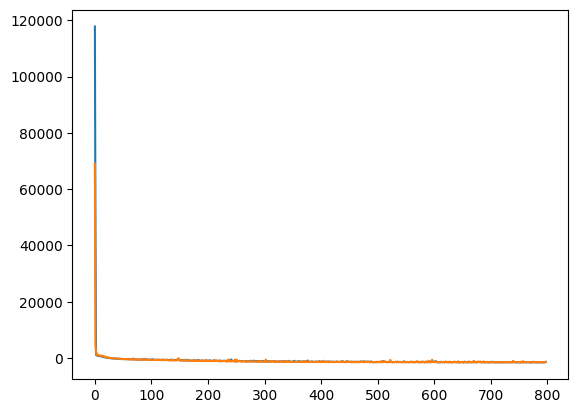

In [8]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
# plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [9]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 8.85948  validloss 9.41001±0.00000  bestvalidloss 9.41001  last_update 0
train: iter 1  trainloss 8.08904  validloss 8.55156±0.00000  bestvalidloss 8.55156  last_update 0
train: iter 2  trainloss 7.41631  validloss 7.83448±0.00000  bestvalidloss 7.83448  last_update 0
train: iter 3  trainloss 6.85176  validloss 7.21668±0.00000  bestvalidloss 7.21668  last_update 0
train: iter 4  trainloss 6.36108  validloss 6.67638±0.00000  bestvalidloss 6.67638  last_update 0
train: iter 5  trainloss 5.92267  validloss 6.20635±0.00000  bestvalidloss 6.20635  last_update 0
train: iter 6  trainloss 5.55635  validloss 5.81688±0.00000  bestvalidloss 5.81688  last_update 0
train: iter 7  trainloss 5.22613  validloss 5.44322±0.00000  bestvalidloss 5.44322  last_update 0
train: iter 8  trainloss 4.93666  validloss 5.15329±0.00000  bestvalidloss 5.15329  last_update 0
train: iter 9  trainloss 4.67603  validloss 4.84747±0.00000  bestvalidloss 4.84747  last_update 0
train: iter 10  trai

train: iter 87  trainloss 0.37103  validloss 0.21347±0.00000  bestvalidloss 0.21347  last_update 0
train: iter 88  trainloss 0.34406  validloss 0.20824±0.00000  bestvalidloss 0.20824  last_update 0
train: iter 89  trainloss 0.30359  validloss 0.24576±0.00000  bestvalidloss 0.20824  last_update 1
train: iter 90  trainloss 0.26848  validloss 0.13048±0.00000  bestvalidloss 0.13048  last_update 0
train: iter 91  trainloss 0.23324  validloss 0.15324±0.00000  bestvalidloss 0.13048  last_update 1
train: iter 92  trainloss 0.19619  validloss 0.08357±0.00000  bestvalidloss 0.08357  last_update 0
train: iter 93  trainloss 0.16915  validloss 0.03533±0.00000  bestvalidloss 0.03533  last_update 0
train: iter 94  trainloss 0.13254  validloss 0.00876±0.00000  bestvalidloss 0.00876  last_update 0
train: iter 95  trainloss 0.13447  validloss -0.00815±0.00000  bestvalidloss -0.00815  last_update 0
train: iter 96  trainloss 0.09060  validloss -0.04335±0.00000  bestvalidloss -0.04335  last_update 0
train:

train: iter 174  trainloss -0.40157  validloss -0.67486±0.00000  bestvalidloss -0.73232  last_update 9
train: iter 175  trainloss -0.37248  validloss -0.61721±0.00000  bestvalidloss -0.73232  last_update 10
train: iter 176  trainloss -0.39727  validloss -0.65507±0.00000  bestvalidloss -0.73232  last_update 11
train: iter 177  trainloss -0.40857  validloss -0.64929±0.00000  bestvalidloss -0.73232  last_update 12
train: iter 178  trainloss -0.39412  validloss -0.70985±0.00000  bestvalidloss -0.73232  last_update 13
train: iter 179  trainloss -0.40040  validloss -0.65274±0.00000  bestvalidloss -0.73232  last_update 14
train: iter 180  trainloss -0.37966  validloss -0.68197±0.00000  bestvalidloss -0.73232  last_update 15
train: iter 181  trainloss -0.39846  validloss -0.71324±0.00000  bestvalidloss -0.73232  last_update 16
train: iter 182  trainloss -0.37636  validloss -0.69395±0.00000  bestvalidloss -0.73232  last_update 17
train: iter 183  trainloss -0.37303  validloss -0.68753±0.00000  

train: iter 254  trainloss -0.41952  validloss -0.68056±0.00000  bestvalidloss -0.75231  last_update 11
train: iter 255  trainloss -0.44435  validloss -0.68861±0.00000  bestvalidloss -0.75231  last_update 12
train: iter 256  trainloss -0.37969  validloss -0.64044±0.00000  bestvalidloss -0.75231  last_update 13
train: iter 257  trainloss -0.40943  validloss -0.74616±0.00000  bestvalidloss -0.75231  last_update 14
train: iter 258  trainloss -0.37913  validloss -0.70080±0.00000  bestvalidloss -0.75231  last_update 15
train: iter 259  trainloss -0.40663  validloss -0.72192±0.00000  bestvalidloss -0.75231  last_update 16
train: iter 260  trainloss -0.39875  validloss -0.66566±0.00000  bestvalidloss -0.75231  last_update 17
train: iter 261  trainloss -0.39920  validloss -0.72128±0.00000  bestvalidloss -0.75231  last_update 18
train: iter 262  trainloss -0.39256  validloss -0.71185±0.00000  bestvalidloss -0.75231  last_update 19
train: iter 263  trainloss -0.40102  validloss -0.70962±0.00000 

train: iter 336  trainloss -0.40766  validloss -0.67319±0.00000  bestvalidloss -0.76164  last_update 2
train: iter 337  trainloss -0.39237  validloss -0.69515±0.00000  bestvalidloss -0.76164  last_update 3
train: iter 338  trainloss -0.41101  validloss -0.71869±0.00000  bestvalidloss -0.76164  last_update 4
train: iter 339  trainloss -0.39209  validloss -0.70157±0.00000  bestvalidloss -0.76164  last_update 5
train: iter 340  trainloss -0.38341  validloss -0.61518±0.00000  bestvalidloss -0.76164  last_update 6
train: iter 341  trainloss -0.41881  validloss -0.68908±0.00000  bestvalidloss -0.76164  last_update 7
train: iter 342  trainloss -0.37586  validloss -0.64707±0.00000  bestvalidloss -0.76164  last_update 8
train: iter 343  trainloss -0.40417  validloss -0.67977±0.00000  bestvalidloss -0.76164  last_update 9
train: iter 344  trainloss -0.41633  validloss -0.69649±0.00000  bestvalidloss -0.76164  last_update 10
train: iter 345  trainloss -0.39358  validloss -0.67395±0.00000  bestval

train: iter 416  trainloss -0.42645  validloss -0.61552±0.00000  bestvalidloss -0.76164  last_update 82
train: iter 417  trainloss -0.38054  validloss -0.74156±0.00000  bestvalidloss -0.76164  last_update 83
train: iter 418  trainloss -0.41912  validloss -0.67138±0.00000  bestvalidloss -0.76164  last_update 84
train: iter 419  trainloss -0.42384  validloss -0.72562±0.00000  bestvalidloss -0.76164  last_update 85
train: iter 420  trainloss -0.39326  validloss -0.66618±0.00000  bestvalidloss -0.76164  last_update 86
train: iter 421  trainloss -0.38991  validloss -0.66346±0.00000  bestvalidloss -0.76164  last_update 87
train: iter 422  trainloss -0.44602  validloss -0.70310±0.00000  bestvalidloss -0.76164  last_update 88
train: iter 423  trainloss -0.38955  validloss -0.70156±0.00000  bestvalidloss -0.76164  last_update 89
train: iter 424  trainloss -0.39635  validloss -0.69202±0.00000  bestvalidloss -0.76164  last_update 90
train: iter 425  trainloss -0.39250  validloss -0.73842±0.00000 

In [10]:
print(vi.initial_belief)

Parameter containing:
tensor([-3.8279, -0.3789, -3.8005, -2.6717], requires_grad=True)


In [11]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 60.73382  validloss 70.59223±0.00000  bestvalidloss 70.59223  last_update 0
train: iter 1  trainloss 42.68284  validloss 53.01281±0.00000  bestvalidloss 53.01281  last_update 0
train: iter 2  trainloss 29.80274  validloss 36.29800±0.00000  bestvalidloss 36.29800  last_update 0
train: iter 3  trainloss 22.02533  validloss 26.52244±0.00000  bestvalidloss 26.52244  last_update 0
train: iter 4  trainloss 17.02197  validloss 20.39461±0.00000  bestvalidloss 20.39461  last_update 0
train: iter 5  trainloss 13.93094  validloss 16.48977±0.00000  bestvalidloss 16.48977  last_update 0
train: iter 6  trainloss 11.77662  validloss 13.87122±0.00000  bestvalidloss 13.87122  last_update 0
train: iter 7  trainloss 10.33078  validloss 12.05871±0.00000  bestvalidloss 12.05871  last_update 0
train: iter 8  trainloss 9.23660  validloss 10.87977±0.00000  bestvalidloss 10.87977  last_update 0
train: iter 9  trainloss 8.53417  validloss 9.73301±0.00000  bestvalidloss 9.73301  last_upd

train: iter 83  trainloss 4.17784  validloss 3.92713±0.00000  bestvalidloss 3.92713  last_update 0
train: iter 84  trainloss 4.17085  validloss 4.13368±0.00000  bestvalidloss 3.92713  last_update 1
train: iter 85  trainloss 4.11794  validloss 4.03736±0.00000  bestvalidloss 3.92713  last_update 2
train: iter 86  trainloss 4.15828  validloss 3.94111±0.00000  bestvalidloss 3.92713  last_update 3
train: iter 87  trainloss 4.14047  validloss 4.07459±0.00000  bestvalidloss 3.92713  last_update 4
train: iter 88  trainloss 4.13454  validloss 3.98636±0.00000  bestvalidloss 3.92713  last_update 5
train: iter 89  trainloss 4.11822  validloss 4.11482±0.00000  bestvalidloss 3.92713  last_update 6
train: iter 90  trainloss 4.13371  validloss 3.98406±0.00000  bestvalidloss 3.92713  last_update 7
train: iter 91  trainloss 4.20559  validloss 4.24096±0.00000  bestvalidloss 3.92713  last_update 8
train: iter 92  trainloss 4.13931  validloss 4.00628±0.00000  bestvalidloss 3.92713  last_update 9
train: ite

train: iter 167  trainloss 4.01850  validloss 4.19165±0.00000  bestvalidloss 3.82067  last_update 63
train: iter 168  trainloss 4.01128  validloss 4.21392±0.00000  bestvalidloss 3.82067  last_update 64
train: iter 169  trainloss 4.02181  validloss 3.99897±0.00000  bestvalidloss 3.82067  last_update 65
train: iter 170  trainloss 3.97786  validloss 4.11344±0.00000  bestvalidloss 3.82067  last_update 66
train: iter 171  trainloss 4.00115  validloss 4.13885±0.00000  bestvalidloss 3.82067  last_update 67
train: iter 172  trainloss 3.96536  validloss 3.97732±0.00000  bestvalidloss 3.82067  last_update 68
train: iter 173  trainloss 4.03147  validloss 4.16821±0.00000  bestvalidloss 3.82067  last_update 69
train: iter 174  trainloss 4.04018  validloss 4.08734±0.00000  bestvalidloss 3.82067  last_update 70
train: iter 175  trainloss 4.06910  validloss 4.02147±0.00000  bestvalidloss 3.82067  last_update 71
train: iter 176  trainloss 3.99374  validloss 4.12394±0.00000  bestvalidloss 3.82067  last_

In [12]:

vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_cartpole_unweighted
base load self.initial_belief.data.sum() tensor(-10.6790)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(5.9352)


In [13]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

1.846486179716945
tensor([0.1972])
